<a href="https://colab.research.google.com/github/samusolva/algoritmos_clasificacao/blob/main/Classificadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install graphviz==0.10
!apt-get install graphviz

  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [41]:
#importa Bibliotecas
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [3]:
#importa dados
url = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(url)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
#cria dicionario para trocar nome das colunas
colunas = {
    'mileage_per_year':'milhas_por_ano',
    'model_year':'ano_modelo',
    'price':'preco',
    'sold':'vendido'
}

dados = dados.rename(columns=colunas)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [5]:
#altera coluna vendido pra dados binarios
vendido = {
    'yes':'1',
    'no':'0'
}
dados.vendido = dados.vendido.map(vendido)
dados.head() 

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [6]:
#calcula o tempo de uso de cada carro
ano_atual = datetime.today().year
dados['idade'] = ano_atual - dados.ano_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [7]:
#calcula coluna quilometros e quilometros totais 
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados['quilometragem'] = dados.km_por_ano * dados.idade
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade,km_por_ano,quilometragem
0,0,21801,2000,30941.02,1,21,35085.22134,736789.64814
1,1,7843,1998,40557.96,1,23,12622.05362,290307.23326
2,2,7109,2006,89627.50,0,15,11440.79806,171611.97090
3,3,26823,2015,95276.14,0,6,43167.32682,259003.96092
4,4,7935,2014,117384.68,1,7,12770.11290,89390.79030


In [8]:
#deleta colunas que nao serao usadas
dados = dados.drop(columns = ['Unnamed: 0','milhas_por_ano','ano_modelo','km_por_ano'], axis=1)
dados.head()

,preco,vendido,idade,quilometragem
0,30941.02,1,21,736789.64814
1,40557.96,1,23,290307.23326
2,89627.50,0,15,171611.97090
3,95276.14,0,6,259003.96092
4,117384.68,1,7,89390.79030


In [9]:
#separa dados e cria base de teste e respota
x = dados[["preco","idade","quilometragem"]]
y= dados["vendido"]

treino_x_raw, teste_x_raw, treino_y,  teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)

In [10]:
#dummy classifier
dummy = DummyClassifier()
dummy.fit(treino_x_raw, treino_y)
acurracia = dummy.score(teste_x_raw, teste_y)*100
print("acurracia foi de %.2f%%" %acurracia)

acurracia foi de 50.20%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [35]:
#define um SEED
SEED = 30

np.random.seed(SEED)

#Linear SVM
linear_svc = LinearSVC()
linear_svc.fit(treino_x_raw, treino_y)
resultado = linear_svc.predict(teste_x_raw)

acurracia = accuracy_score(teste_y, resultado)*100
print("acurracia foi de %.2f%%" %acurracia)

acurracia foi de 42.00%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
#SVC Dados não escalonados 
svc = SVC()
svc.fit(treino_x_raw, treino_y)
resultado = svc.predict(teste_x_raw)

acurracia = accuracy_score(teste_y, resultado)*100
print("acurracia foi de %.2f%%" %acurracia)

acurracia foi de 72.92%


In [39]:
#escalonando dados
scaler = StandardScaler()
scaler.fit(treino_x_raw)
treino_x = scaler.transform(treino_x_raw)
teste_x = scaler.transform(teste_x_raw)

#SVC Dados não escalonados 
svc = SVC()
svc.fit(treino_x, treino_y)
resultado = svc.predict(teste_x)

acurracia = accuracy_score(teste_y, resultado)*100
print("acurracia foi de %.2f%%" %acurracia)

acurracia foi de 77.04%


In [42]:
#arvore de decisões
arvore_decisao = DecisionTreeClassifier(max_depth=4)
arvore_decisao.fit(treino_x_raw,treino_y)
resultado = arvore_decisao.predict(teste_x_raw)

acurracia = accuracy_score(teste_y, resultado)*100
print("acurracia foi de %.2f%%" %acurracia)

acurracia foi de 78.92%


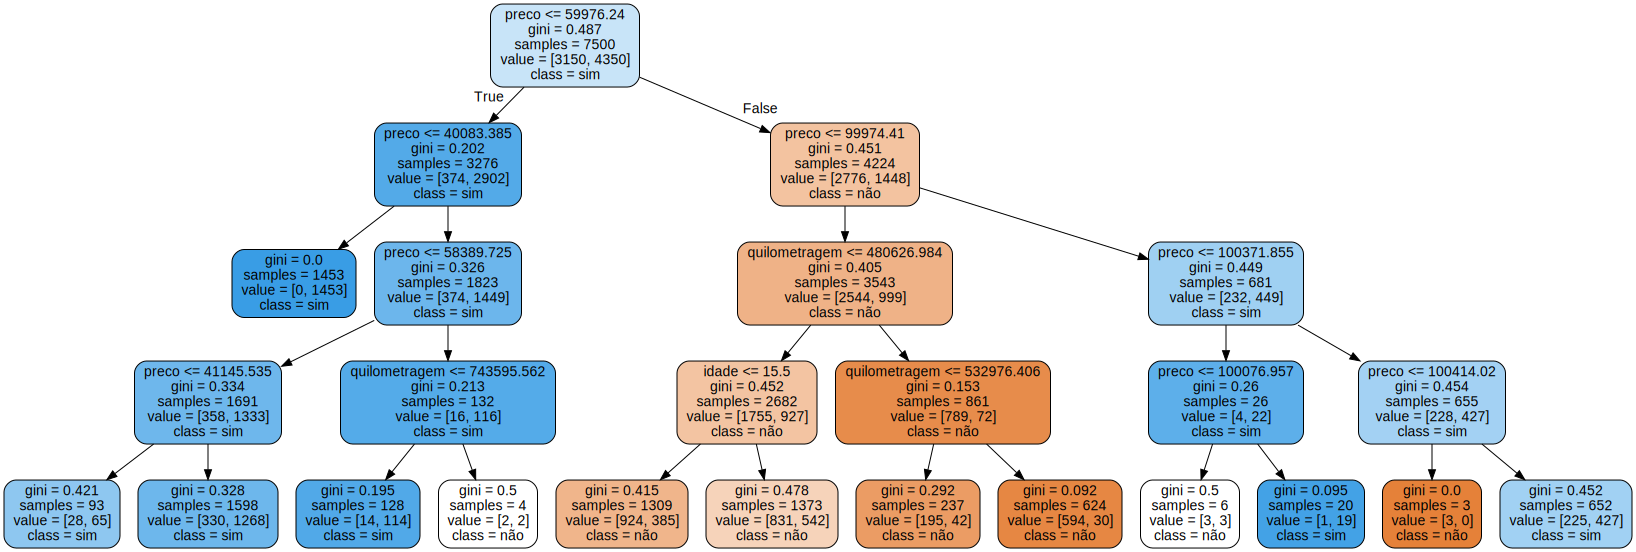

In [43]:
#Mostra arvore de decisções criadas
features = x.columns
dot_data = export_graphviz(arvore_decisao, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico